In [157]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
%matplotlib inline
import pickle
import gensim
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

plt.style.use("dark_background")

In [5]:
def load_model(path='LDA model/lda.model'):
    return LdaModel.load(path)

In [6]:
def load_dictionary(path='dataframes/dictionary.gensim'):
    return Dictionary.load(path)

In [7]:
def load_corpus(path='dataframes/corpus.pkl'):
    with open(path, 'rb') as file:
        corpus = pickle.load(file)
    return corpus

In [4]:
def export_dataframe(dataframe, path, file_format='csv'):
    if file_format == 'csv':
        dataframe.to_csv(path, index=False)
    elif file_format == 'pkl':
        dataframe.to_pickle(path, index=False)

In [8]:
def import_dataframe(path):
    df = pd.DataFrame()
    
    if path.endswith('.csv'):
        df = pd.read_csv(path)
    elif path.endswith('.pkl'):
        df = pd.read_pickle(path)
        
    return df

## Load dictionary and corpus

In [9]:
dictionary = load_dictionary('dataframes/dictionary.gensim')
corpus = load_corpus('dataframes/corpus.pkl')

print('Number of unique tokens: {}'.format(len(dictionary)))
print('Number of documents: {}'.format(len(corpus)))

Number of unique tokens: 7037
Number of documents: 3889


## Load optimal LDA model

In [92]:
lda_model = load_model('LDA model/lda.model')
num_topics = lda_model.num_topics
print('Number of topics: {}'.format(num_topics))

Number of topics: 29


## Visualization

In [86]:
lda_model.show_topics(formatted = False)

[(16,
  [('trustee', 0.11253729),
   ('bankruptcy', 0.09762992),
   ('trust', 0.07859363),
   ('bankrupt', 0.037940808),
   ('debt', 0.0288535),
   ('debtor', 0.02818724),
   ('creditor', 0.026776517),
   ('petition', 0.021321364),
   ('estate', 0.020278076),
   ('benefit', 0.020251207)]),
 (28,
  [('group', 0.07858778),
   ('area', 0.058791567),
   ('land', 0.040424105),
   ('determination', 0.03524365),
   ('water', 0.029032495),
   ('people', 0.018164963),
   ('aboriginal', 0.012452972),
   ('custom', 0.010935469),
   ('claimant', 0.010084928),
   ('holder', 0.009706515)]),
 (5,
  [('patent', 0.041636303),
   ('product', 0.029902507),
   ('design', 0.023616143),
   ('copyright', 0.020797553),
   ('infringement', 0.019662859),
   ('invention', 0.018904926),
   ('register', 0.018490294),
   ('good', 0.017699925),
   ('specification', 0.015571262),
   ('mark', 0.01512271)]),
 (21,
  [('income', 0.078634165),
   ('assessment', 0.05267998),
   ('commissioner', 0.044172905),
   ('taxpayer

In [87]:
print(lda_model.show_topics(formatted = False)[1][])
#print(dictionary.token2id)
for word in dictionary.token2id:
    print(word)
    break;

[('group', 0.07858778), ('area', 0.058791567), ('land', 0.040424105), ('determination', 0.03524365), ('water', 0.029032495), ('people', 0.018164963), ('aboriginal', 0.012452972), ('custom', 0.010935469), ('claimant', 0.010084928), ('holder', 0.009706515)]
absence


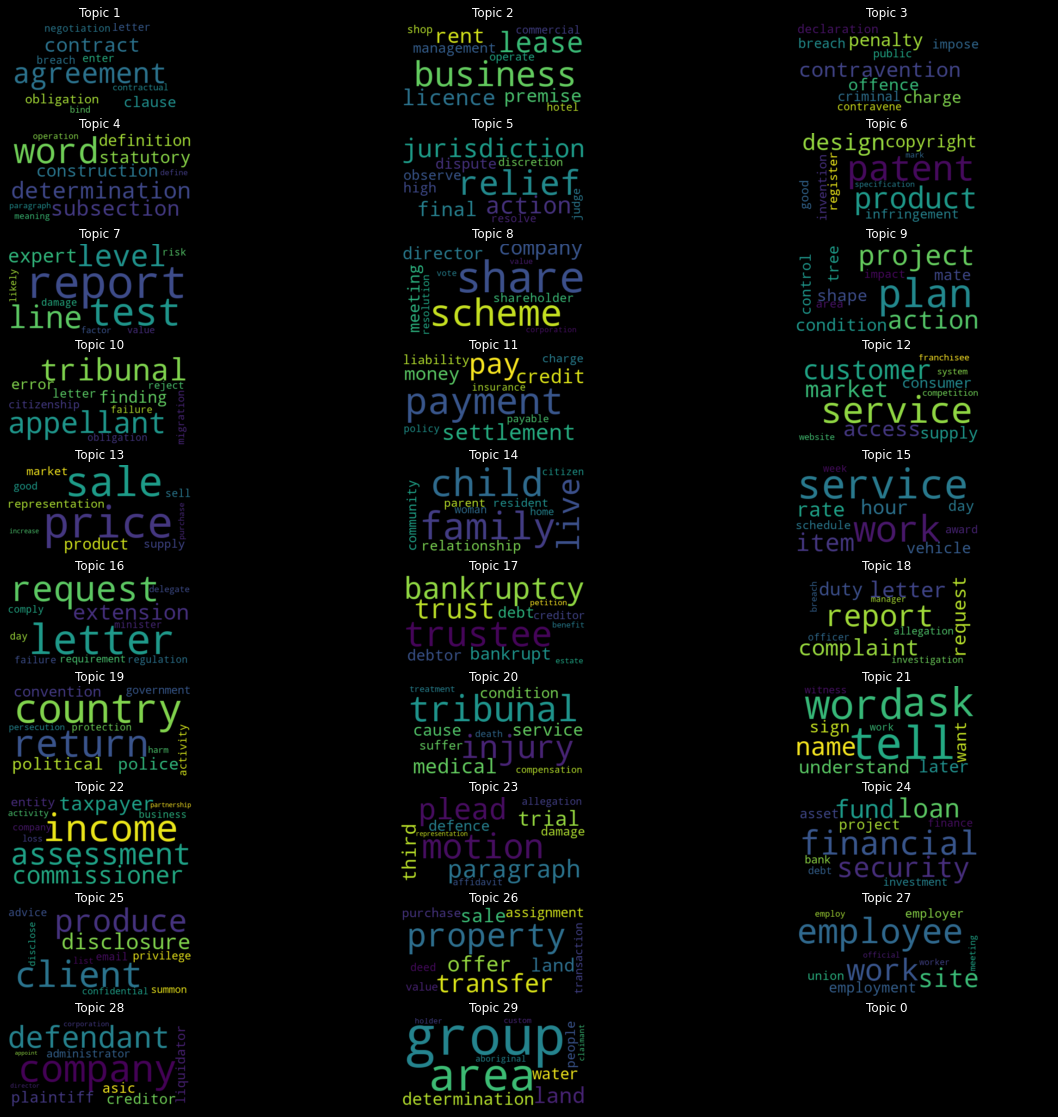

In [110]:
topics = lda_model.show_topics(num_topics=num_topics, num_words=10, formatted = False)

fig, axes = plt.subplots(10, 3, figsize=(20, 20), facecolor='black')

for i, ax in enumerate(axes.flatten()):
    ax.axis("off") 
    plt.gca().set_title("Topic {}".format(i), color = 'white')
    
    if i >= num_topics:
        break

    fig.add_subplot(ax)
    topic_keywords = dict(topics[i][1])

    wordcloud = WordCloud()
    wordcloud.generate_from_frequencies(frequencies=topic_keywords)
    
    ax.imshow(wordcloud, interpolation='bilinear')

plt.show()

### Plot number of documents in each topic

In [123]:
doc_topics_df = pd.read_csv('dataframes/topics_of_documents.csv')
df.head()

,dominant_topic,perc_contribution,topic_keywords,text
0,4.0,0.3999,"relief, jurisdiction, action, final, dispute, ...",background current application applicant holdi...
1,17.0,0.2325,"report, complaint, letter, request, duty, alle...",application order review judicial_review conce...
2,24.0,0.3343,"client, produce, disclosure, privilege, advice...",notice motion file bring first second third ap...
3,0.0,0.1887,"agreement, contract, clause, obligation, enter...",introduction brand company know come marketing...
4,21.0,0.1860,"income, assessment, commissioner, taxpayer, en...",context present application appeal application...


Text(0, 0.5, 'Number of documents per topic')

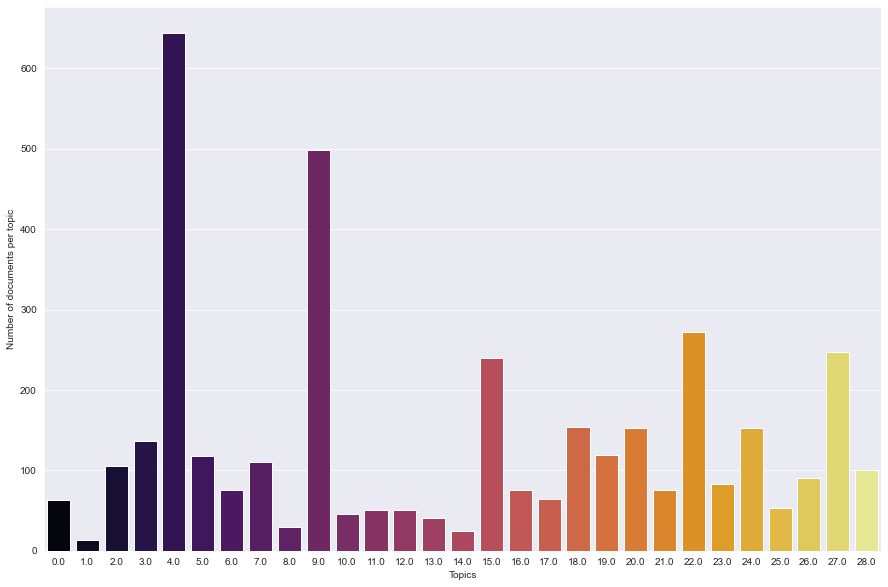

In [152]:
plt.figure(figsize=(15, 10))
sns.countplot(data=doc_topics_df, x='dominant_topic', palette='inferno')
plt.xlabel('Topics')
plt.ylabel('Number of documents per topic')

In [127]:
representative_docs_df = pd.read_csv('dataframes/representative_document_per_topic.csv')
representative_docs_df.head()

,topic,perc_contribution,topic_keywords,text
0,0.0,0.7975,"client, letter, email, advice, produce, record...",warrant issue australian crime_commission auth...
1,1.0,0.6753,"property, fund, loan, asset, financial, bank, ...",worldwide stock market collapse couple commonl...
2,2.0,0.6857,"contravention, penalty, charge, offence, crimi...",young emigrate year year later dead die lapida...
3,3.0,0.6270,"construction, water, word, access, operation, ...",work commercial previously hold permit take va...
4,4.0,0.8886,"motion, relief, plead, trial, paragraph, actio...",yesterday seek leave court file swear grant le...


### Plot contribution of dominant topics in the most representative documents

Text(0, 0.5, 'Contribution of dominant topic in the most representative documents')

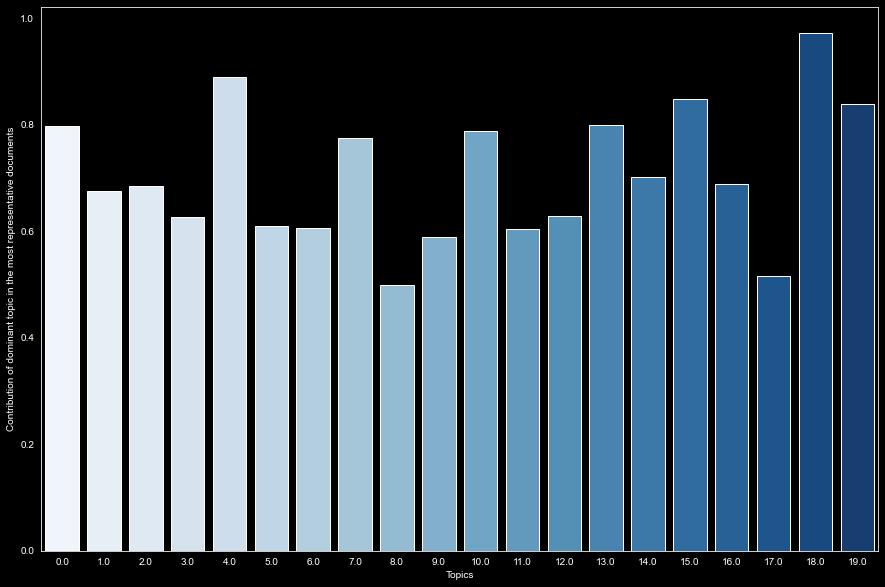

In [162]:
plt.figure(figsize=(15, 10))
sns.barplot(x='topic', y='perc_contribution', data=representative_docs_df, palette='Blues')
plt.xlabel('Topics')
plt.ylabel('Contribution of dominant topic in the most representative documents')

### Plot 10 words for each topic and total number of occurances of that word in that topic

client, letter, email, advice, produce, record, disclosure, privilege, summon, send
property, fund, loan, asset, financial, bank, money, project, transfer, investment
contravention, penalty, charge, offence, criminal, impose, public, officer, law, foreign
construction, water, word, access, operation, definition, permit, define, control, meaning
motion, relief, plead, trial, paragraph, action, offer, third, defence, allegation
product, patent, design, copyright, infringement, invention, shape, specification, manufacture, device
representation, good, word, name, consumer, business, service, mark, sale, website
share, company, scheme, director, meeting, shareholder, resolution, value, vote, offer
tell, ask, work, understand, word, later, witness, want, much, look
complaint, report, system, activity, test, level, staff, allegation, management, response
company, defendant, creditor, plaintiff, asic, liquidator, administrator, corporation, debt, director
price, market, service, supply, sale,

KeyError: 20